In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)
coordinates

[(-60.759438028968844, -82.54725250229664),
 (-68.9113000508813, -176.65579640179303),
 (82.94289980262909, 103.14829256273714),
 (-2.8252807867470153, 108.8281502046458),
 (45.994337297468206, -44.87497499113027),
 (-40.14824037543531, -84.33257414732807),
 (59.759724672285444, -4.537221187457163),
 (83.73853744031194, -87.57176578897027),
 (60.668653270617995, -117.96690242929485),
 (50.87214163886762, -125.23632724925432),
 (-8.260023839552929, 95.71042667528695),
 (23.112833848077145, -102.34364777151147),
 (-17.73307713303778, -165.48222110361368),
 (30.706770337634268, -48.1501947270323),
 (-17.01393021112797, -135.0963936245858),
 (12.893837682712046, 157.09253540645778),
 (-65.83370396144242, 2.187762444430973),
 (89.71766145398635, 158.19435394798546),
 (7.255922851063659, 161.43146179483716),
 (-61.608854097264526, -33.944069270232944),
 (-35.99624043608159, -8.09590108276359),
 (31.22728614897106, 33.02545547266567),
 (74.57963329256972, 26.944961965427296),
 (70.96205887779

In [5]:
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
cities

['punta arenas',
 'vaini',
 'khatanga',
 'manggar',
 'torbay',
 'ancud',
 'stromness',
 'qaanaaq',
 'hay river',
 'campbell river',
 'bengkulu',
 'banon',
 'alofi',
 'saint george',
 'rikitea',
 'kavieng',
 'hermanus',
 'cherskiy',
 'butaritari',
 'mar del plata',
 'jamestown',
 'port said',
 'mehamn',
 'norman wells',
 'ushuaia',
 'barentsburg',
 'bethel',
 'frontera',
 'tuatapere',
 'esperance',
 'busselton',
 'tasiilaq',
 'yellowknife',
 'atuona',
 'malka',
 'kushima',
 'chapais',
 'saldanha',
 'vila franca do campo',
 'nome',
 'mafra',
 'strezhevoy',
 'port blair',
 'varadero',
 'gemena',
 'wana',
 'nizhneyansk',
 'hearst',
 'provideniya',
 'upernavik',
 'los llanos de aridane',
 'hilo',
 'belushya guba',
 'flagstaff',
 'arraial do cabo',
 'darhan',
 'gorontalo',
 'sitka',
 'hobart',
 'cabo san lucas',
 'albany',
 'geraldton',
 'kholtoson',
 'puerto ayacucho',
 'bluff',
 'chokurdakh',
 'victoria',
 'souillac',
 'saquarema',
 'bardiyah',
 'karaul',
 'greensburg',
 'kargopol',
 'diks

In [6]:
import requests

# Import the API key.
from config import weather_api_key

In [8]:
from datetime import datetime

In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d129cc2706c7bafdd3f5e7724dc152ff


In [18]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | namibe
Processing Record 2 of Set 13 | mar del plata
Processing Record 3 of Set 13 | butaritari
Processing Record 4 of Set 13 | longyearbyen
Processing Record 5 of Set 13 | esil
Processing Record 6 of Set 13 | ushuaia
Processing Record 7 of Set 13 | trairi
Processing Record 8 of Set 13 | taburi
City not found. Skipping...
Processing Record 9 of Set 13 | provideniya
Processing Record 10 of Set 13 | forrest city
Processing Record 11 of Set 13 | tuktoyaktuk
Processing Record 12 of Set 13 | diego de almagro
Processing Record 13 of Set 13 | busselton
Processing Record 14 of Set 13 | tugolesskiy bor
Processing Record 15 of Set 13 | yellowknife
Processing Record 16 of Set 13 | leningradskiy
Processing Record 17 of Set 13 | jamestown
Processing Record 18 of Set 13 | mataura
Processing Record 19 of Set 13 | paita
Processing Record 20 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 21 

Processing Record 34 of Set 16 | stokmarknes
Processing Record 35 of Set 16 | kavieng
Processing Record 36 of Set 16 | malwan
City not found. Skipping...
Processing Record 37 of Set 16 | adrar
Processing Record 38 of Set 16 | vasylivka
Processing Record 39 of Set 16 | jaciara
Processing Record 40 of Set 16 | cabo san lucas
Processing Record 41 of Set 16 | tabiauea
City not found. Skipping...
Processing Record 42 of Set 16 | handwara
City not found. Skipping...
Processing Record 43 of Set 16 | georgetown
Processing Record 44 of Set 16 | conceicao do araguaia
Processing Record 45 of Set 16 | mackay
Processing Record 46 of Set 16 | luba
Processing Record 47 of Set 16 | narasannapeta
Processing Record 48 of Set 16 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 16 | kalmunai
Processing Record 50 of Set 16 | touros
Processing Record 1 of Set 17 | balboa
Processing Record 2 of Set 17 | chuy
Processing Record 3 of Set 17 | cap malheureux
Processing Record 4 of

Processing Record 17 of Set 20 | soyo
Processing Record 18 of Set 20 | kolpashevo
Processing Record 19 of Set 20 | nuoro
Processing Record 20 of Set 20 | skjervoy
Processing Record 21 of Set 20 | petropavlovsk-kamchatskiy
Processing Record 22 of Set 20 | anadyr
Processing Record 23 of Set 20 | santa fe
Processing Record 24 of Set 20 | esna
Processing Record 25 of Set 20 | harlingen
Processing Record 26 of Set 20 | port macquarie
Processing Record 27 of Set 20 | salalah
Processing Record 28 of Set 20 | bumba
Processing Record 29 of Set 20 | rincon
Processing Record 30 of Set 20 | kegayli
City not found. Skipping...
Processing Record 31 of Set 20 | borodino
Processing Record 32 of Set 20 | qaqortoq
Processing Record 33 of Set 20 | maldonado
Processing Record 34 of Set 20 | port blair
Processing Record 35 of Set 20 | clyde river
Processing Record 36 of Set 20 | payo
Processing Record 37 of Set 20 | kahului
Processing Record 38 of Set 20 | atikokan
Processing Record 39 of Set 20 | nago
Pro

Processing Record 4 of Set 24 | bardiyah
Processing Record 5 of Set 24 | monopoli
Processing Record 6 of Set 24 | jasper
Processing Record 7 of Set 24 | atbasar
Processing Record 8 of Set 24 | assai
Processing Record 9 of Set 24 | quechultenango
Processing Record 10 of Set 24 | sao miguel do araguaia
Processing Record 11 of Set 24 | contai
Processing Record 12 of Set 24 | lichinga
Processing Record 13 of Set 24 | morogoro
Processing Record 14 of Set 24 | dauphin
Processing Record 15 of Set 24 | wuwei
Processing Record 16 of Set 24 | bitung
Processing Record 17 of Set 24 | waipawa
Processing Record 18 of Set 24 | okhotsk
Processing Record 19 of Set 24 | belaya
Processing Record 20 of Set 24 | fredericton
Processing Record 21 of Set 24 | san andres
Processing Record 22 of Set 24 | kostino
Processing Record 23 of Set 24 | shingu
Processing Record 24 of Set 24 | dehloran
Processing Record 25 of Set 24 | saint-fabien
City not found. Skipping...
Processing Record 26 of Set 24 | ayacucho
Proc

In [19]:
city_data

[{'City': 'Namibe',
  'Lat': -15.1961,
  'Lng': 12.1522,
  'Max Temp': 87.8,
  'Humidity': 62,
  'Cloudiness': 40,
  'Wind Speed': 16.11,
  'Country': 'AO',
  'Date': '2021-04-11 15:59:05'},
 {'City': 'Mar Del Plata',
  'Lat': -38.0023,
  'Lng': -57.5575,
  'Max Temp': 64.99,
  'Humidity': 72,
  'Cloudiness': 75,
  'Wind Speed': 14.97,
  'Country': 'AR',
  'Date': '2021-04-11 15:59:05'},
 {'City': 'Butaritari',
  'Lat': 3.0707,
  'Lng': 172.7902,
  'Max Temp': 80.96,
  'Humidity': 77,
  'Cloudiness': 56,
  'Wind Speed': 9.57,
  'Country': 'KI',
  'Date': '2021-04-11 15:59:05'},
 {'City': 'Longyearbyen',
  'Lat': 78.2186,
  'Lng': 15.6401,
  'Max Temp': 17.6,
  'Humidity': 62,
  'Cloudiness': 75,
  'Wind Speed': 16.11,
  'Country': 'SJ',
  'Date': '2021-04-11 15:59:06'},
 {'City': 'Esil',
  'Lat': 51.9556,
  'Lng': 66.4042,
  'Max Temp': 30.52,
  'Humidity': 90,
  'Cloudiness': 0,
  'Wind Speed': 7.38,
  'Country': 'KZ',
  'Date': '2021-04-11 15:59:06'},
 {'City': 'Ushuaia',
  'Lat': -5

In [20]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Namibe,-15.1961,12.1522,87.80,62,40,16.11,AO,2021-04-11 15:59:05
1,Mar Del Plata,-38.0023,-57.5575,64.99,72,75,14.97,AR,2021-04-11 15:59:05
2,Butaritari,3.0707,172.7902,80.96,77,56,9.57,KI,2021-04-11 15:59:05
3,Longyearbyen,78.2186,15.6401,17.60,62,75,16.11,SJ,2021-04-11 15:59:06
4,Esil,51.9556,66.4042,30.52,90,0,7.38,KZ,2021-04-11 15:59:06
5,Ushuaia,-54.8000,-68.3000,48.20,46,0,5.75,AR,2021-04-11 15:59:06
6,Trairi,-3.2778,-39.2689,86.18,63,57,11.68,BR,2021-04-11 15:59:06
7,Provideniya,64.3833,-173.3000,8.08,88,100,24.29,RU,2021-04-11 15:59:07
8,Forrest City,35.0081,-90.7898,63.00,59,1,13.85,US,2021-04-11 15:59:07
9,Tuktoyaktuk,69.4541,-133.0374,-18.40,76,20,4.61,CA,2021-04-11 15:59:07


In [21]:
weather_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[weather_data]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Namibe,AO,2021-04-11 15:59:05,-15.1961,12.1522,87.80,62,40,16.11
1,Mar Del Plata,AR,2021-04-11 15:59:05,-38.0023,-57.5575,64.99,72,75,14.97
2,Butaritari,KI,2021-04-11 15:59:05,3.0707,172.7902,80.96,77,56,9.57
3,Longyearbyen,SJ,2021-04-11 15:59:06,78.2186,15.6401,17.60,62,75,16.11
4,Esil,KZ,2021-04-11 15:59:06,51.9556,66.4042,30.52,90,0,7.38
...,...,...,...,...,...,...,...,...,...
559,Moissala,TD,2021-04-11 16:01:55,8.3404,17.7663,103.59,12,86,5.59
560,Olafsvik,IS,2021-04-11 16:01:56,64.8945,-23.7142,36.57,98,100,16.80
561,Colac,AU,2021-04-11 16:01:56,-38.3333,143.5833,46.99,1,52,5.99
562,Paamiut,GL,2021-04-11 16:01:57,61.9940,-49.6678,35.01,78,8,10.78


In [23]:
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/11/21'

<function matplotlib.pyplot.show(close=None, block=None)>

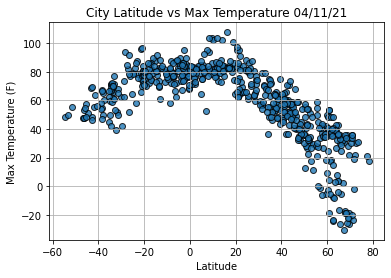

In [28]:
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")

plt.show

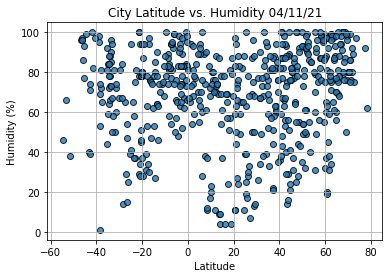

In [29]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

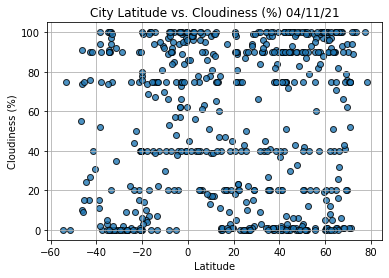

In [30]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

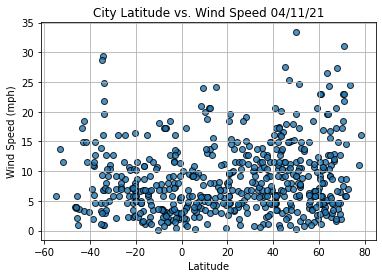

In [31]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                  Yellowknife
Country                        CA
Date          2021-04-11 15:57:21
Lat                        62.456
Lng                      -114.353
Max Temp                     -7.6
Humidity                       71
Cloudiness                     75
Wind Speed                   8.05
Name: 13, dtype: object

In [47]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Butaritari,KI,2021-04-11 15:59:05,3.0707,172.7902,80.96,77,56,9.57
3,Longyearbyen,SJ,2021-04-11 15:59:06,78.2186,15.6401,17.60,62,75,16.11
4,Esil,KZ,2021-04-11 15:59:06,51.9556,66.4042,30.52,90,0,7.38
7,Provideniya,RU,2021-04-11 15:59:07,64.3833,-173.3000,8.08,88,100,24.29
8,Forrest City,US,2021-04-11 15:59:07,35.0081,-90.7898,63.00,59,1,13.85
...,...,...,...,...,...,...,...,...,...
558,Nador,MA,2021-04-11 16:01:55,35.1740,-2.9287,71.60,52,0,11.50
559,Moissala,TD,2021-04-11 16:01:55,8.3404,17.7663,103.59,12,86,5.59
560,Olafsvik,IS,2021-04-11 16:01:56,64.8945,-23.7142,36.57,98,100,16.80
562,Paamiut,GL,2021-04-11 16:01:57,61.9940,-49.6678,35.01,78,8,10.78


In [40]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Namibe,AO,2021-04-11 15:59:05,-15.1961,12.1522,87.80,62,40,16.11
1,Mar Del Plata,AR,2021-04-11 15:59:05,-38.0023,-57.5575,64.99,72,75,14.97
5,Ushuaia,AR,2021-04-11 15:59:06,-54.8000,-68.3000,48.20,46,0,5.75
6,Trairi,BR,2021-04-11 15:59:06,-3.2778,-39.2689,86.18,63,57,11.68
10,Diego De Almagro,CL,2021-04-11 15:59:08,-26.3667,-70.0500,77.38,25,0,7.36
...,...,...,...,...,...,...,...,...,...
547,Kingaroy,AU,2021-04-11 16:01:51,-26.5333,151.8333,51.80,54,0,8.05
550,Ndende,GA,2021-04-11 16:01:53,-2.4008,11.3581,95.00,52,75,0.47
554,Himatangi,NZ,2021-04-11 16:01:54,-40.4000,175.3167,55.99,97,31,3.06
556,Ipixuna,BR,2021-04-11 16:01:54,-1.7625,-48.8043,89.60,62,75,8.05


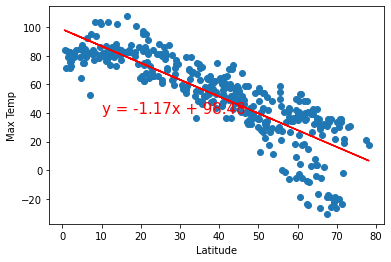

In [48]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

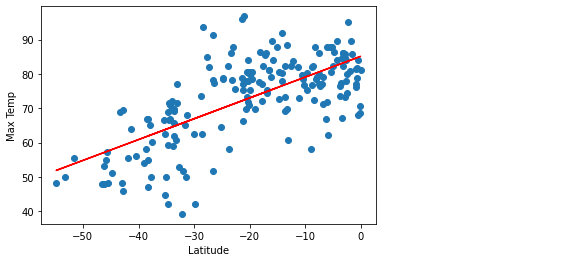

In [45]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

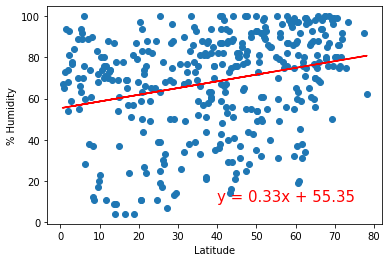

In [49]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

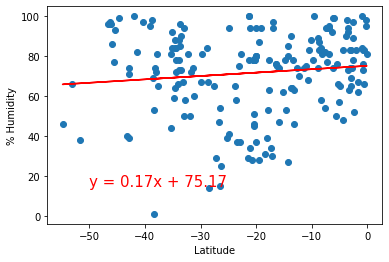

In [51]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

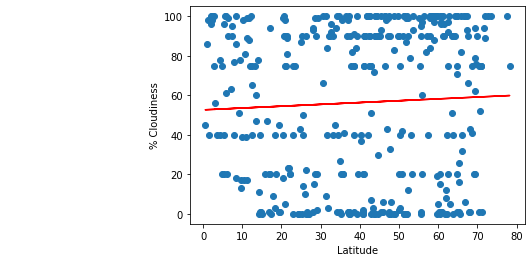

In [55]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

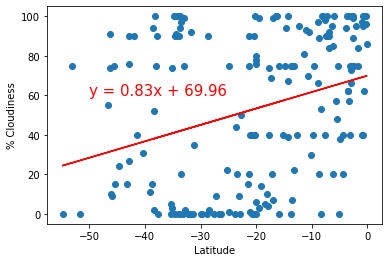

In [54]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

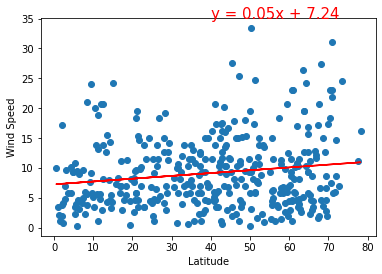

In [57]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

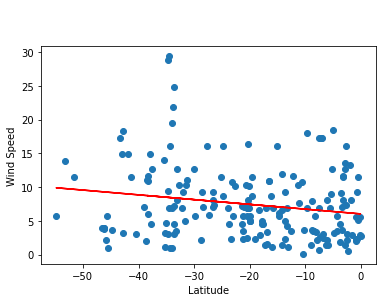

In [58]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))